In [1]:
import pandas as pd 
import numpy as np
import os
import category_encoders as c
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


* imported 
           - pandas,numpy to perform operations on dataframe and nd-array
           - category_encoders to do encoding on training,testing data
           - seaborn to implement data visualization
           - train_test_split to split training data
           - metrics to calculate accuracy score

# Loading training data

In [2]:
training_data = pd.read_csv("/kaggle/input/titanic/train.csv")
training_data.head() #displays top 5 rows from training_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Loading test data

In [3]:
testing_data=pd.read_csv("/kaggle/input/titanic/test.csv")
testing_data.head() #displays top 5 rows from test data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Data Pre-processing

# Check if any missing values in train data

In [4]:
training_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing values are found in columns Age=177, Cabin=687, Embarked=2

# Check if any missing values in test data

In [5]:
testing_data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Missing values are found in columns Age=86, Cabin=327 performance can be increased

# Replacing the missing values in training_data

In [6]:
training_data['Age']=training_data['Age'].fillna(training_data['Age'].mean())
training_data['Cabin']=training_data['Cabin'].fillna(training_data['Cabin'].mode()[0])
training_data['Embarked']=training_data['Embarked'].fillna(training_data['Embarked'].mode()[0])

Since the type of data in Age column is numerical, I have replaced the missing values with their mean. For the categorical data in columns Cabin,Embarked, replaced missing values with their most repeated value(mode)

# Missing values fixed in training_data

In [7]:
training_data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# Replacing missing values in testing_data

In [8]:
testing_data['Age']=testing_data['Age'].fillna(testing_data['Age'].mean())
testing_data['Fare']=testing_data['Fare'].fillna(testing_data['Fare'].mean())
testing_data['Cabin']=training_data['Cabin'].fillna(testing_data['Cabin'].mode()[0])

Since the type of data in columns Age,Fare is numerical, I have replaced the missing values with their mean. For the categorical data in columns Cabin,Embarked, replaced missing values with their most repeated value(mode)

# Missing values fixed in testing_data

In [9]:
testing_data.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# Data Visualization

# Survival rate with Pclass, Fare plotting

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

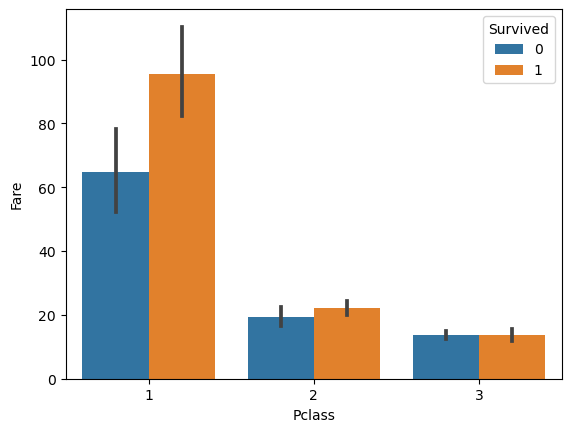

In [10]:
sns.barplot(data=training_data,x="Pclass",y="Fare",hue="Survived")

# Dependency of gender on Parch, SibSp with Survival rate

<AxesSubplot:xlabel='family', ylabel='count'>

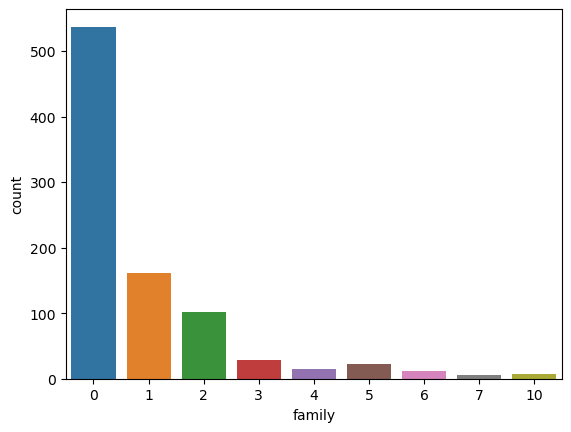

In [11]:
df=pd.DataFrame()
df["family"]=training_data["SibSp"]+training_data["Parch"]
sns.countplot(data=training_data,x=df["family"])

# Dependency of Gender and survival rate

In [12]:
women_survived=training_data.loc[training_data.Sex=="female"]["Survived"]
women_per=sum(women_survived)/len(women_survived)
print("percentage of women survived: ",women_per)
men_survived=training_data.loc[training_data.Sex=="male"]["Survived"]
men_per=sum(men_survived)/len(men_survived)
print("percentage of men survived: ",men_per)


percentage of women survived:  0.7420382165605095
percentage of men survived:  0.18890814558058924


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

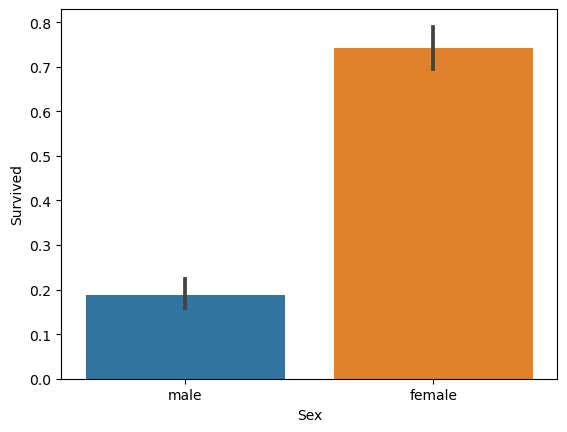

In [13]:
sns.barplot(data=training_data,x="Sex",y="Survived")

# Different states of Embarked with survival rate

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

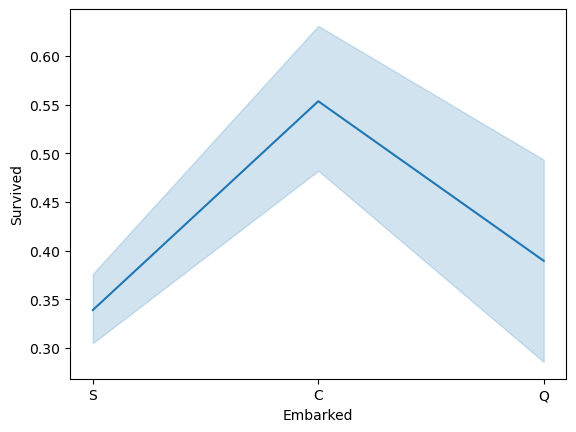

In [14]:
sns.lineplot(data=training_data,x="Embarked",y="Survived")

# Pclass vs Ticket

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

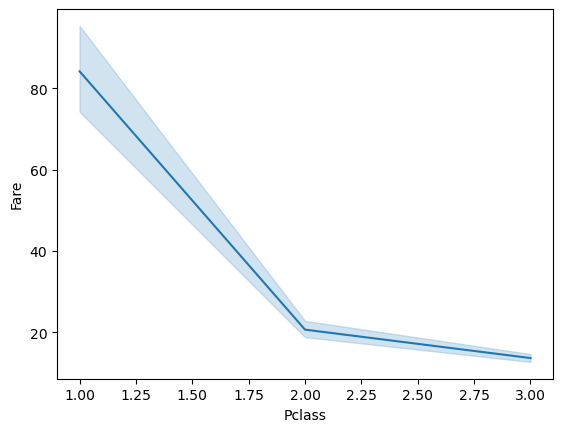

In [15]:
sns.lineplot(data=training_data,x="Pclass",y="Fare")

# Converting training categorical data to numerical data

In [16]:
training_data['Name'] =training_data['Name'].astype('category').cat.codes
training_data['Sex'] =training_data['Sex'].astype('category').cat.codes
training_data['Embarked'] =training_data['Embarked'].astype('category').cat.codes
training_data['Cabin'] =training_data['Cabin'].astype('category').cat.codes
training_data['Ticket'] =training_data['Ticket'].astype('category').cat.codes

# Data Pre-processing-Converting testing categorical data to numerical data

In [17]:
testing_data['Name'] =testing_data['Name'].astype('category').cat.codes
testing_data['Sex'] =testing_data['Sex'].astype('category').cat.codes
testing_data['Embarked'] =testing_data['Embarked'].astype('category').cat.codes
testing_data['Cabin'] =testing_data['Cabin'].astype('category').cat.codes
testing_data['Ticket'] =testing_data['Ticket'].astype('category').cat.codes

# Encoding training data using Binary Encoder

In [18]:
encoder=c.BinaryEncoder(cols=['Name','Sex','Ticket','Cabin','Embarked'],return_df=True)
encoder.fit_transform(training_data)

,PassengerId,Survived,Pclass,Name_0,Name_1,Name_2,Name_3,Name_4,Name_5,Name_6,...,Cabin_0,Cabin_1,Cabin_2,Cabin_3,Cabin_4,Cabin_5,Cabin_6,Cabin_7,Embarked_0,Embarked_1
0,1,0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,2,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,3,1,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,4,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
4,5,0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,1,0,1,1,1,0,...,0,0,0,0,0,0,0,1,0,1
887,888,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,1,0,0,1
888,889,0,3,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,1,0,1
889,890,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,1,1,1,0


# Encoding testing data

In [19]:
encoder=c.BinaryEncoder(cols=['Name','Sex','Ticket','Cabin','Embarked'],return_df=True)
encoder.fit_transform(testing_data)

,PassengerId,Pclass,Name_0,Name_1,Name_2,Name_3,Name_4,Name_5,Name_6,Name_7,...,Fare,Cabin_0,Cabin_1,Cabin_2,Cabin_3,Cabin_4,Cabin_5,Cabin_6,Embarked_0,Embarked_1
0,892,3,0,0,0,0,0,0,0,0,...,7.8292,0,0,0,0,0,0,1,0,1
1,893,3,0,0,0,0,0,0,0,1,...,7.0000,0,0,0,0,0,1,0,1,0
2,894,2,0,0,0,0,0,0,0,1,...,9.6875,0,0,0,0,0,0,1,0,1
3,895,3,0,0,0,0,0,0,1,0,...,8.6625,0,0,0,0,0,1,1,1,0
4,896,3,0,0,0,0,0,0,1,0,...,12.2875,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,1,1,0,0,1,1,1,1,...,8.0500,0,0,0,0,0,0,1,1,0
414,1306,1,1,1,0,0,1,1,1,1,...,108.9000,0,0,0,0,0,0,1,1,1
415,1307,3,1,1,0,1,0,0,0,0,...,7.2500,0,0,0,0,0,0,1,1,0
416,1308,3,1,1,0,1,0,0,0,0,...,8.0500,0,0,0,0,0,0,1,1,0


# Feature Selection

# Using the features given by Kaggle

In [20]:
from sklearn.ensemble import RandomForestClassifier

y = training_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(training_data[features])
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.37, random_state=42)
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)
print(metrics.accuracy_score(y_test,predictions))

0.806060606060606


In [21]:
test_predict = model.predict(testing_data[features])
test_predict


array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [22]:
output = pd.DataFrame({'PassengerId': testing_data.PassengerId, 'Survived': test_predict})
output.to_csv('submission_original.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


# Correlation values with Survived column

In [23]:
col_names=['PassengerId','Survived','Pclass',"Name","Sex","Age","SibSp","Parch","Ticket","Fare","Cabin","Embarked"]
corr_values=training_data[training_data.columns[0:]].corr()['Survived']
print(corr_values)

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Name          -0.057343
Sex           -0.543351
Age           -0.069809
SibSp         -0.035322
Parch          0.081629
Ticket        -0.164549
Fare           0.257307
Cabin          0.175690
Embarked      -0.167675
Name: Survived, dtype: float64


# Setting coefficient threshold

In [24]:
for i in range(len(corr_values)):
    if abs(corr_values[i]) > 0.1:
        print(col_names[i])

Survived
Pclass
Sex
Ticket
Fare
Cabin
Embarked


# HeatMap generation using correlation values

<AxesSubplot:>

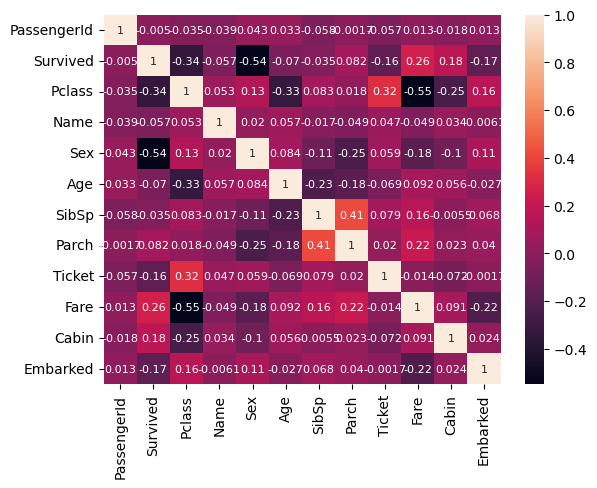

In [25]:
sns.heatmap(training_data.corr(), annot=True,annot_kws={'size': 8})

Columns Pclass,Sex,Parch,Ticket,Fare,Cabin,Embarked have are positively correlated with Survival rate. Among these Sex,Pclass,Fare are highly correlated.

# Accuracy score calculation with correlation parameters using Random Forest Classifier

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

y = training_data["Survived"]
features = ["Pclass","SibSp","Parch","Sex","Fare","Cabin","Embarked"]
X = pd.get_dummies(training_data[features])
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.37, random_state=42)
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions_c = model.predict(X_test)
print(metrics.accuracy_score(y_test,predictions_c))

0.8333333333333334


# Model prediction on test data

In [27]:
test_predict = model.predict(testing_data[features])
test_predict

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

# Generating output csv

In [28]:
output = pd.DataFrame({'PassengerId': testing_data.PassengerId, 'Survived': test_predict})
output.to_csv('submission_corr.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


# Chi-Square test

In [29]:
from sklearn.feature_selection import chi2
X = training_data.drop('Survived',axis=1)
y = training_data['Survived']
chi_scores = chi2(X,y)
chi_scores

(array([3.31293407e+00, 3.08736994e+01, 4.35568915e+02, 9.27024470e+01,
        2.46879258e+01, 2.58186538e+00, 1.00974991e+01, 2.87165547e+03,
        4.51831909e+03, 2.84482789e+02, 1.02025247e+01]),
 array([6.87366651e-02, 2.75378563e-08, 9.97314604e-97, 6.07783826e-22,
        6.74051416e-07, 1.08094210e-01, 1.48470676e-03, 0.00000000e+00,
        0.00000000e+00, 7.92037850e-64, 1.40248517e-03]))

<AxesSubplot:>

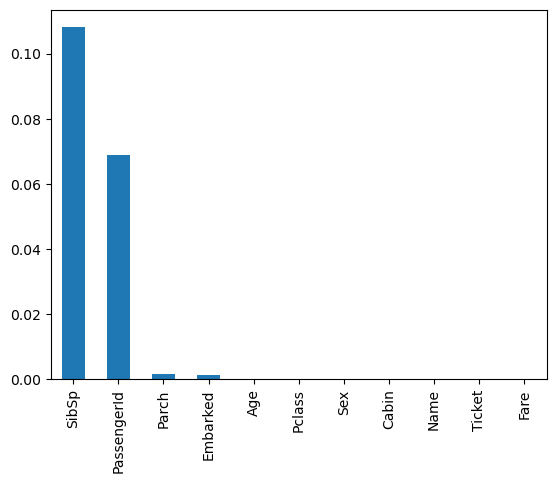

In [30]:
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)
p_values.plot.bar()

Features selected from above graph are Parch,Embarked,Age,Pclass,Sex,Cabin,Name,Ticket,Fare

# Train-test split

In [31]:
y = training_data["Survived"]

features = ["Pclass","Name","Sex","Age","Parch","Ticket","Fare","Cabin","Embarked",]
X = pd.get_dummies(training_data[features])
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.37, random_state=42)
accuracy=[]

# Model prediction using Linear SVC

In [32]:
from sklearn import svm
linear_svm = svm.SVC(kernel='linear', C = 1.0)
linear_svm.fit(X,y)
predictions_svm=linear_svm.predict(X_test)
accuracy.append(metrics.accuracy_score(y_test,predictions_svm))

# Model Prediction using Decision Tree Classifier

In [33]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=3, min_samples_leaf=5)
dc.fit(X,y)
predictions_dc=dc.predict(X_test)
accuracy.append(metrics.accuracy_score(y_test,predictions_dc))

# Model prediction using Logisitic Regression classifier


In [34]:
from sklearn import linear_model
lr_model= linear_model.LogisticRegression(max_iter=1000)  
lr_model.fit(X, y)  
predictions_lr = lr_model.predict(X_test)
accuracy.append(metrics.accuracy_score(y_test,predictions_lr))

In [35]:
test_predict = lr_model.predict(testing_data[features])
test_predict

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [36]:
output = pd.DataFrame({'PassengerId': testing_data.PassengerId, 'Survived': test_predict})
output.to_csv('submission_lr.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


# Model prediction using RandomForest classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions_rf = model.predict(X_test)
accuracy.append(metrics.accuracy_score(y_test,predictions_rf))


# Model prediction on test dataset

In [38]:
test_predict = model.predict(testing_data[features])
test_predict

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

# Generating output csv

In [39]:
output = pd.DataFrame({'PassengerId': testing_data.PassengerId, 'Survived': test_predict})
output.to_csv('submission_randomeforest.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


# Plotting accuracy scores of all classifiers

            Classifiers  Accuracies
0            Linear SVM    0.784848
1         Decision Tree    0.806061
2  Logisitic Regression    0.803030
3         Random Forest    0.854545


<AxesSubplot:xlabel='Classifiers', ylabel='Accuracies'>

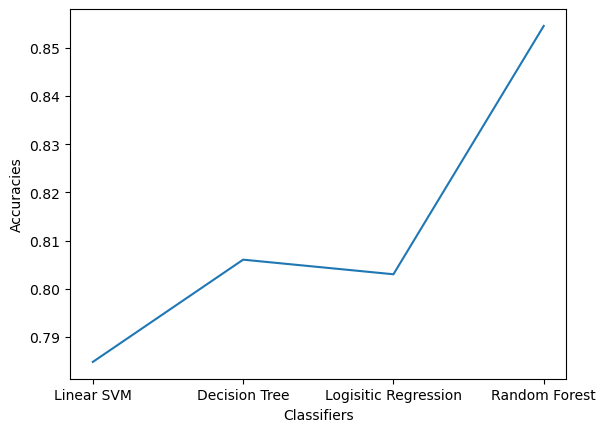

In [40]:
class_accuracy=[["Linear SVM",accuracy[0]],["Decision Tree",accuracy[1]],["Logisitic Regression",accuracy[2]],["Random Forest",accuracy[3]]]
df=pd.DataFrame(class_accuracy,columns=["Classifiers","Accuracies"])
print(df)
sns.lineplot(data=df,x=df["Classifiers"],y=df["Accuracies"])